<center> <h1>PRIMERA PREDICIÓN DEL SUEÑO DE UN PACIENTE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>

[URL PHYSIONET](https://physionet.org/content/sleep-accel/1.0.0/)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
lista_pacientes_sueño=[]
for file in (os.listdir("labels")):
    lista_pacientes_sueño.append(os.path.join("labels",file))
    lista_pacientes_sueño=sorted(lista_pacientes_sueño)
    
lista_pacientes_frecuencia_cardiaca=[]
for file in os.listdir("heart_rate"):
    lista_pacientes_frecuencia_cardiaca.append(os.path.join("heart_rate",file))

lista_pacientes_pasos=[]
for file in os.listdir("steps"):
    lista_pacientes_pasos.append(os.path.join("steps",file))

lista_pacientes_movimiento=[]
for file in os.listdir("motion"):
    lista_pacientes_movimiento.append(os.path.join("motion",file))

Representación de los datos de frecuencia cardiaca y sueño de un paciente: completos y los de la noche de la polisomnografía

Nº de etiquetas de sueño, muestras: 951


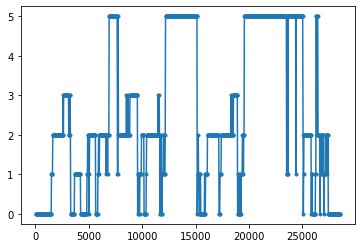

In [3]:
pac_sueño=pd.read_csv(lista_pacientes_sueño[0], delimiter=' ')
pac_sueño.columns=["Tiempo","Sueño"]
x=pac_sueño[["Tiempo"]]
y=pac_sueño[["Sueño"]]
plt.figure()
plt.plot(x,y, marker='.')
print('Nº de etiquetas de sueño, muestras:',len(pac_sueño))

In [4]:
# EJE DE TIEMPO FRECUENCIA CARDIACA

# N = len(pac_sueño)
# fs=1/30
# t=np.arange(0,N)/fs
# plt.figure()
# plt.plot(t,y, marker='.')
# horas = t[-1]/3600
# print('Se recogen',horas.round(2),'de sueño')

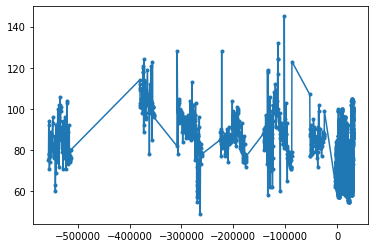

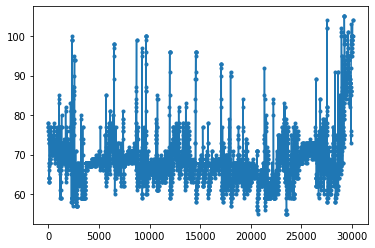

In [5]:
pac_card=pd.read_csv(lista_pacientes_frecuencia_cardiaca[0])
pac_card.columns=["Tiempo","Frecuencia_cardio"]
x=pac_card[["Tiempo"]]
y=pac_card[["Frecuencia_cardio"]]
plt.figure()
plt.plot(x,y, marker='.')

pac_card=pac_card[pac_card["Tiempo"]>0]
x=pac_card[["Tiempo"]]
y=pac_card[["Frecuencia_cardio"]]
plt.figure()
plt.plot(x,y, marker='.')


In [6]:
len(pac_card)

5792

In [7]:
# EJE DE TIEMPO FRECUENCIA CARDIACA

# N = len(pac_card)
# fs=1/(5.5) #Cada 5.5 segundos se coge una muestra 30000/N
# t=np.arange(0,N)/fs
# plt.plot(t,y)

Con el siguiente código se consigue un dataframe que contiene las matrices de los 31 pacientes. 

Estas matrices se componen por el tiempo, la frecuencia cardiaca y sus correspondientes etiquetas del sueño. Tiene entonces una dimensión de 31 filas x 3 columnas. Iremos añadiendo columnas conforme añadamos características.

In [8]:
matriz_tiempo = []
matriz_frecuencia = []
matriz_sueño = []

for n in range(len(lista_pacientes_sueño)):
    pac_sueño=pd.read_csv(lista_pacientes_sueño[n], delimiter=' ')
    pac_sueño.columns=["Tiempo","Fase sueño"]
    tiempo=np.array(pac_sueño["Tiempo"])
    sueño=np.array(pac_sueño["Fase sueño"])

            
    # FREC. CARDÍACA: entrada
    pac_card=pd.read_csv(lista_pacientes_frecuencia_cardiaca[n])
    pac_card.columns=["Tiempo","Frec card"]
    
    pac_card=pac_card[pac_card["Tiempo"]>0]
    pac_card=pac_card.iloc[[i for i in range(0,len(pac_card),5)]]
    pac_card=pac_card.iloc[0:len(pac_sueño)]
    frec=np.array(pac_card["Frec card"])


    matriz_tiempo.append(tiempo)
    matriz_frecuencia.append(frec)
    matriz_sueño.append(sueño)

In [9]:
df = pd.DataFrame([matriz_tiempo,matriz_frecuencia,matriz_sueño],index=['Tiempo','Frecuencia_cardiaca','Etiquetas_sueño']).T

df

,Tiempo,Frecuencia_cardiaca,Etiquetas_sueño
0,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77, 75, 75, 67, 63, 68, 69, 77, 73, 71, 72, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[86, 86, 81, 82, 86, 80, 69, 68, 74, 67, 67, 6...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[74, 72, 76, 77, 75, 72, 75, 76, 92, 87, 77, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0,..."
3,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[52, 54, 49, 54, 54, 57, 51, 52, 58, 59, 59, 5...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[62, 70, 59, 60, 69, 59, 60, 59, 63, 60, 62, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
5,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77.0, 74.0, 73.0, 74.0, 72.0, 71.0, 72.0, 71....","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
6,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[86, 65, 61, 57, 58, 59, 59, 55, 54, 57, 61, 5...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
7,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77, 69, 77, 76, 76, 75, 71, 75, 75, 77, 69, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[68, 63, 64, 64, 67, 58, 71, 68, 73, 74, 68, 6...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[65, 59, 54, 50, 47, 49, 49, 51, 50, 50, 50, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [10]:
df.fillna(0)

,Tiempo,Frecuencia_cardiaca,Etiquetas_sueño
0,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77, 75, 75, 67, 63, 68, 69, 77, 73, 71, 72, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[86, 86, 81, 82, 86, 80, 69, 68, 74, 67, 67, 6...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[74, 72, 76, 77, 75, 72, 75, 76, 92, 87, 77, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0,..."
3,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[52, 54, 49, 54, 54, 57, 51, 52, 58, 59, 59, 5...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[62, 70, 59, 60, 69, 59, 60, 59, 63, 60, 62, 7...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
5,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77.0, 74.0, 73.0, 74.0, 72.0, 71.0, 72.0, 71....","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
6,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[86, 65, 61, 57, 58, 59, 59, 55, 54, 57, 61, 5...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
7,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[77, 69, 77, 76, 76, 75, 71, 75, 75, 77, 69, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[68, 63, 64, 64, 67, 58, 71, 68, 73, 74, 68, 6...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
9,"[30, 60, 90, 120, 150, 180, 210, 240, 270, 300...","[65, 59, 54, 50, 47, 49, 49, 51, 50, 50, 50, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Ahora vamos a establecer el target y los datos de entrada y a separar en Train y Test:

In [11]:
X = df['Frecuencia_cardiaca']
y = df['Etiquetas_sueño']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Ahora que ya tenemos los datos preparados, los utilizamos para hacer una máquina de vectores soporte:

In [12]:
svc_clf = SVC(C=10**5, kernel='rbf',gamma=0.0001) #kernel gaussiano

**Esto es lo que no funciona, porque da algún error en la forma de los datos de entrada, creo que en y_train. Puede que sea por la dimensión**

In [13]:
svc_clf.fit(X_train, y_train)
y_pred_1 = svclassifier.predict(X_test)

ValueError: setting an array element with a sequence.

Método de evaluación con classification report y confusion matrix:

In [ ]:
acc_test= svc_clf.score(X_test, y_test).round(4)
acc_train= svc_clf.score(X_train, y_train).round(4)
print('La exactitud para el modelo de SVM en el conjunto de TEST es:',acc_test,'\n')
print('La exactitud para el modelo de SVM en el conjunto de TRAIN es:',acc_train,'\n')

print('Confusion Matrix')
print(confusion_matrix(y_test, predict),'\n')
print("=============== Classification Report ================")
print(classification_report(y_test, predict))
#precision=TP/(TP+FP)
#recall es lo mismo que sensibilidad recall=TP/(TP+FN)

* Ahora que ya tenemos df, podemos hacer histogramas y cosas asi que dijo jl que le gustan mucho
* El siguiente paso sería seguir modificando las variables de entrada para que tengan mejor calidad e ir añadiendo otras nuevas, sólo está la f.cardiaca.